In [6]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import SVG
from graphviz  import Source
from IPython.display import display
from IPython.display import HTML
style = "<style>svg{width: 20% !important; height: 20% !important;} </style>"
HTML(style)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [9]:
train_iris = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_iris.csv', index_col=0)
test_iris = pd.read_csv('https://stepik.org/media/attachments/course/4852/test_iris.csv', index_col=0)

In [12]:
X_train = train_iris.drop(['species'], axis=1)

In [13]:
y_train = train_iris['species']

In [17]:
X_test = test_iris.drop(['species'], axis=1)

In [18]:
y_test = test_iris['species']

In [23]:
np.random.seed(0)

In [37]:
max_depth_values = range(1, 100)
scores_data = pd.DataFrame()

In [38]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    temp_score_data = pd.DataFrame({'max_depth' : [max_depth], 'train_score' : [train_score],
                              'test_score' : [test_score]})
    scores_data = scores_data.append(temp_score_data)

In [39]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score'],
                               var_name='set_type', value_name='score')

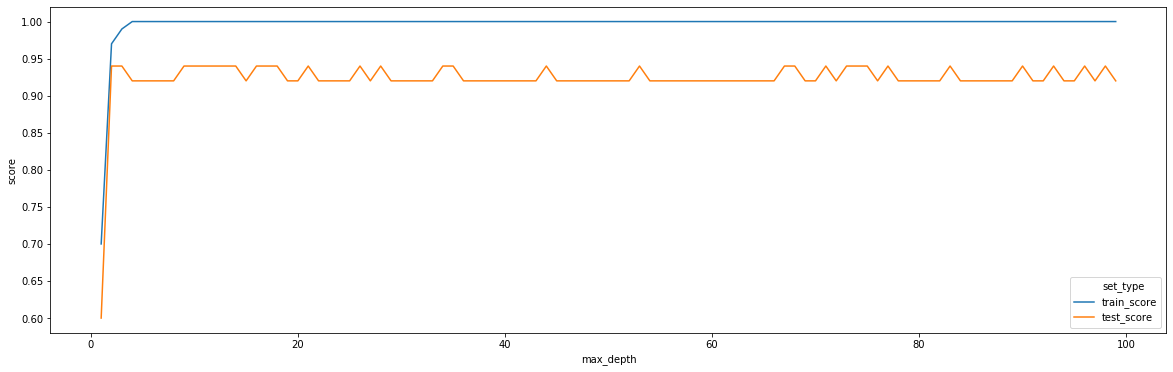

In [40]:
plt.figure(figsize=(20, 6))
sns.lineplot(x="max_depth", y="score", hue="set_type", data=scores_data_long);